In [3]:
# -*- coding: utf-8 -*-

import functools
import numpy as np
import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt


import pso
import ann
#activationLayer="tanh"
#np.random.seed(6663)
def dim_weights(shape):
    dim = 0
    for i in range(len(shape)-1):
        dim = dim + (shape[i] + 1) * shape[i+1]
    return dim

def weights_to_vector(weights):
    w = np.asarray([])
    for i in range(len(weights)):
        v = weights[i].flatten()
        w = np.append(w, v)
    return w

def vector_to_weights(vector, shape):
    weights = []
    idx = 0
    for i in range(len(shape)-1):
        r = shape[i+1]
        c = shape[i] + 1
        idx_min = idx
        idx_max = idx + r*c
        W = vector[idx_min:idx_max].reshape(r,c)
        weights.append(W)
    return weights



#this is the optimisation for the coords of the particles??
def eval_neural_network(weights, shape, X, y,activationLayer):
    mse = np.asarray([])
    for w in weights:
        weights = vector_to_weights(w, shape)
        nn = ann.MultiLayerPerceptron(shape, weights=weights)
        y_pred = nn.run(X,activationLayer)
        #print("eval network :",y.shape,y_pred.shape,X.shape)
        mse = np.append(mse, sklearn.metrics.mean_squared_error(y, y_pred))
    return mse

def print_best_particle(best_particle):
    print("New best particle found at iteration #{i} with mean squared error: {score}".format(i=best_particle[0], score=best_particle[1]))




#just xy error = 0.22938741634873416
#with sinx sin y error = 0.2325498216710004
#with sin and sq error = 0.21790465807135315

In [4]:

def sine(X):
    return np.sin(X)


#loading Starts here

def sq(X):
    return np.power(X,2)

num_classes = 2
f = open("two_spirals.dat","r")
data = np.loadtxt(f)
X = data[:,0:2]
y = data[:,2]
y = y.astype(int)

 

def generateData(X,y,ratio,sin=False,square=False):
    if sin and square:
        X = np.hstack((X,np.hstack((sq(X),sine(X)))))
      #  print(X[0])
    elif sin:
        X=np.hstack((X,sine(X)))
    elif square:
        X = np.hstack((X,sq(X)))
    train_test_split = int(ratio*len(y))
    X_train,X_test = X[:train_test_split],X[train_test_split:]
    y_train,y_test = y[:train_test_split],y[train_test_split:]  
    return X,X_train,X_test,y_train,y_test

X,X_train,X_test,y_train,y_test=generateData(X,y,0.5,True,True)


#so x train and y train are basically x and y in this file

X = X_train
y = y_train
print(len(y_train))
print(X_train.shape)

132
(132, 6)


In [5]:

# # Load MNIST digits from sklearn

# num_classes = 10
# mnist = sklearn.datasets.load_digits(num_classes)
# X, X_test, y, y_test = sklearn.model_selection.train_test_split(mnist.data, mnist.target)

num_inputs = X.shape[1]
print("Number of inputs = ",num_inputs)
y_true = np.zeros((len(y), num_classes))

for i in range(len(y)):
    y_true[i, y[i]] = 1
  #  print(y_true[i],y[i])

y_test_true = np.zeros((len(y_test), num_classes))
for i in range(len(y_test)):
    y_test_true[i, y_test[i]] = 1

# print("y test shap e= ", y_test.shape)
# print("y true shape = ",y_true.shape)
# print("y test true shape = ",y_test_true.shape)
# print(X_test.shape)
# print(X_train.shape)

print(y_test_true.shape,y_true.shape)

Number of inputs =  6
(132, 2) (132, 2)


In [6]:
iterations = 4000

def training(shape,activationLayer):
  #  print("input  :",X.shape,y_true.shape)
    cost_func = functools.partial(eval_neural_network, shape=shape, X=X, y=y_true.T,activationLayer=activationLayer)

    swarm = pso.ParticleSwarm(cost_func, num_dimensions=dim_weights(shape), num_particles=30,chi=0.729845 ,phi_p=2.055,phi_g=2.055)
  #  swarm = pso.ParticleSwarm(cost_func, num_dimensions=dim_weights(shape), num_particles=40,chi=0.729845 ,phi_p=1.5,phi_g=0.9)
   
    # Train...
    i = 0
    best_scores = [(i, swarm.best_score)]
    #print_best_particle(best_scores[-1])
    
    trainingLoss = []
    testloss = []
    while swarm.best_score>1e-6 and i<iterations:
        swarm._update()
        i = i+1
        
        best_weights = vector_to_weights(swarm.g, shape)
        best_nn = ann.MultiLayerPerceptron(shape, weights=best_weights)
        y_test_pred =np.round(best_nn.run(X_test,activationLayer),0)
        testError = sklearn.metrics.mean_squared_error((y_test_true.T),y_test_pred)
        
        #print("index = ",i)
#         if i%2500==0 and swarm.best_score < best_scores[-1][1]:
#             best_scores.append((i, swarm.best_score))
#             print_best_particle(best_scores[-1])
#             #training per epoch
#             print("Mean absolute error score for index   =",i,(activationLayer,testError))
        trainingLoss.append(swarm.best_score)
        testloss.append(testError)
        
    # Test...
#     print("shape of test pred : ",y_test_pred.shape)
    
#     best_weights = vector_to_weights(swarm.g, shape)
#     best_nn = ann.MultiLayerPerceptron(shape, weights=best_weights)

#     y_test_pred =np.round(best_nn.run(X_test,activationLayer),0)
#     points = np.arange(iterations)
#     plt.plot(points,testloss,color="b",label="Test loss")
#     plt.plot(points,trainingLoss,color="r",label="Train loss")
#     plt.xlabel("Iterations")
#     plt.ylabel("Error")
#     plt.title(activationLayer)
#     plt.legend()
#     plt.show()


    ##this is dumb
    #eval neural network is pritning the mean squared error at each time
  #  print("best score = ",best_scores[ -1])
  #  print(sklearn.metrics.classification_report(y_test_true, y_test_pred.T))

  #  print("Mean absolute error score for  =",(activationLayer, sklearn.metrics.mean_squared_error(y_test_true,y_test_pred.T)))
    #print("Accuracy score = ",sklearn.metrics.accuracy_score(y_test_true,y_test_pred.T))
    return testloss


In [7]:
# shape=(num_inputs,4,num_classes)
# activationLayer="relu"
# testLoss = training(shape,activationLayer)
# points = np.arange(iterations)
# plt.plot(points[4:],testLoss[4:])
# plt.show()
# # # training(shape,"sigmoid")

In [8]:
activations = ['tanh','sigmoid','relu','identity']#,'relu','default']
#iterations = 10000

def testRun():
    '''
    I want mse to be y axis
    I want neurons to be x axis
    then I will have 3 plots, tanh, sigmoid and relu?
    '''
    #shape = (num_inputs, 8, num_classes)

    neurons = [4,5,6,7,8]
    arrays = np.zeros(shape=(len(activations),len(neurons),iterations))
    
    for i in range(len(arrays)):
        activationLayer = activations[i]
        for k in range(len(neurons)):
            shape = (num_inputs,neurons[k],num_classes)
            mse = training(shape,activationLayer)
            arrays[i][k]=mse
            
            print(f"Activation = {activations[i].capitalize()} neurons = {neurons[k]} with mse of {mse[-1]}")
     #   print(i)
    
    return arrays
arrays = testRun()

Activation = Tanh neurons = 4 with mse of 0.2765151515151515
Activation = Tanh neurons = 5 with mse of 0.24242424242424243
Activation = Tanh neurons = 6 with mse of 0.2159090909090909
Activation = Tanh neurons = 7 with mse of 0.15151515151515152
Activation = Tanh neurons = 8 with mse of 0.22348484848484848
Activation = Sigmoid neurons = 4 with mse of 0.3409090909090909
Activation = Sigmoid neurons = 5 with mse of 0.22727272727272727
Activation = Sigmoid neurons = 6 with mse of 0.20454545454545456
Activation = Sigmoid neurons = 7 with mse of 0.125
Activation = Sigmoid neurons = 8 with mse of 0.07575757575757576
Activation = Relu neurons = 4 with mse of 0.3371212121212121
Activation = Relu neurons = 5 with mse of 0.32954545454545453
Activation = Relu neurons = 6 with mse of 0.36363636363636365
Activation = Relu neurons = 7 with mse of 0.2840909090909091
Activation = Relu neurons = 8 with mse of 0.32196969696969696
Activation = Identity neurons = 4 with mse of 0.4393939393939394
Activatio

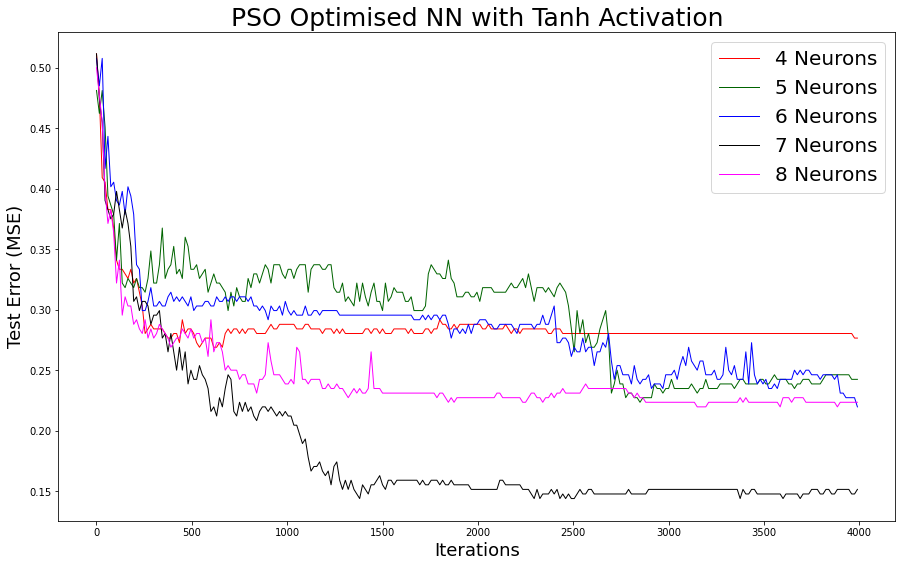

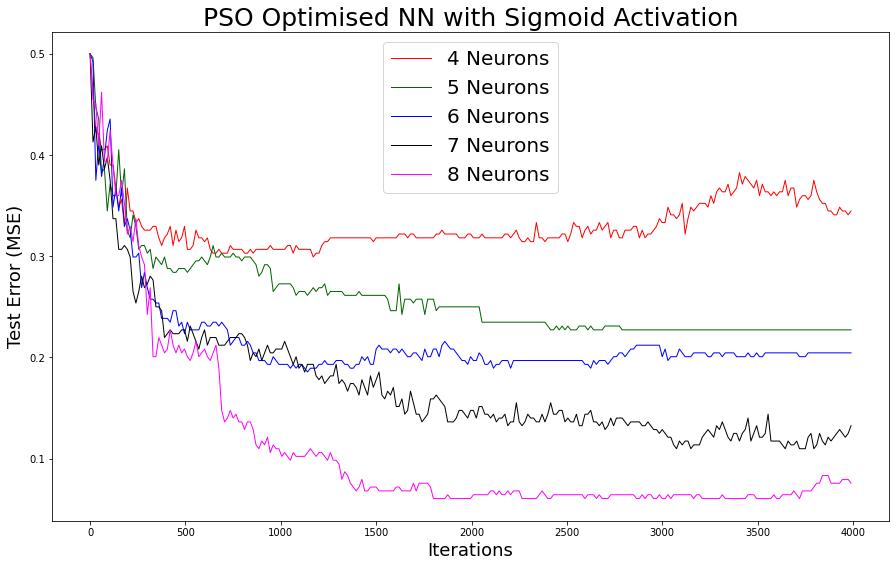

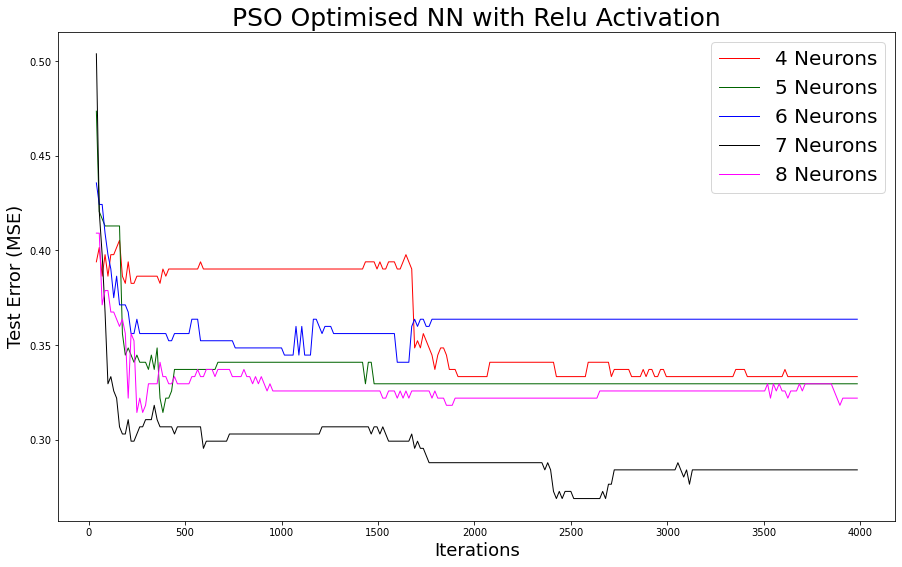

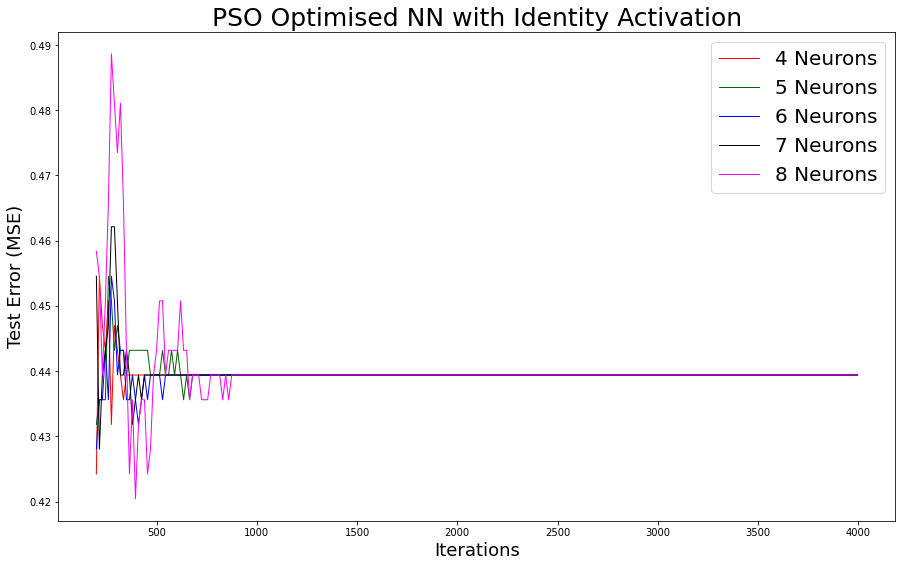

0.06060606060606061


In [18]:
neurons = [4,5,6,7,8]
points = np.arange(iterations)
colors = ['r','darkgreen','b','k','fuchsia']
stepSize = 15
plt.rcParams["figure.figsize"] = (15,9)
 
for i in range(len(activations)):
    for k in range(len(neurons)):
        if activations[i]=="relu":
            plt.plot(points[40::stepSize],arrays[i][k][40::stepSize],color=colors[k],label= "{0} Neurons".format(neurons[k]),linewidth=1)
        elif activations[i]=="identity":
            plt.plot(points[200::stepSize],arrays[i][k][200::stepSize],color=colors[k],label= "{0} Neurons".format(neurons[k]),linewidth=1)

        else:
            plt.plot(points[::stepSize],arrays[i][k][::stepSize],color=colors[k],label= "{0} Neurons".format(neurons[k]),linewidth=1)
    #plt.yticks(np.arange(0, 10, 20))  

    #  plt.figure(figsize=(12,12))
    #plt.xticks(np.arange(0,, 5))
    plt.title(f"PSO Optimised NN with {activations[i].capitalize()} Activation",fontsize=25)
    plt.legend(fontsize=20)    
    plt.xlabel("Iterations",fontsize=18)
    plt.ylabel("Test Error (MSE)",fontsize=18)
    plt.savefig("figs/{0}.svg".format(activations[i].capitalize()))  

    plt.show()

print(np.amin(arrays))

In [16]:
#for svg the best is 0.06


# neurons = [4,5,6,7,8]
# plt.figure(figsize=(7,7))
# plt.plot(neurons,arrays[1],color='r',label="tanh")
# plt.plot(neurons,arrays[0],color='g',label="sigmoid")
# #plt.plot(neurons,arrays[2],color='c',label="relu")
# #plt.plot(neurons,arrays[3],color='b',label="Identity")
# plt.xlabel("Neurons")
# plt.ylabel("Test error: MSE")
# plt.legend()
# plt.show()
# print("hello")

In [ ]:
'''
Using the brute force method figure out the optimal functions

then use the same functions in PSO and compare it with base line

'''

In [ ]:
shape = (2,5,2)
dim =dim_weights(shape)
particles = 30
X = np.random.uniform(low=-100,high=100,size=(particles, dim))
X

In [ ]:
np.random.seed(2)
